In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("bioAI.mplstyle")
import torch
import scipy
from scipy.spatial import Voronoi, voronoi_plot_2d

from methods import phase_kde, activity_kde
from models import Similitude
from plotting_functions import scatter3d
from utils import rotation_matrix

In [2]:
model = torch.load('./saved-models/Similitude3-100-dirac')

In [3]:
phases = model.phases.clone().detach().numpy()

#phases = model.unit_cell.sample(100)
wrapped_phases = model.unit_cell.wrap(phases)

In [4]:
kernel, tiled_phases = phase_kde(model.unit_cell, wrapped_phases, bw_method = 0.1)

In [5]:
samples = model.unit_cell.sample(40000)
kde = kernel(samples.T)

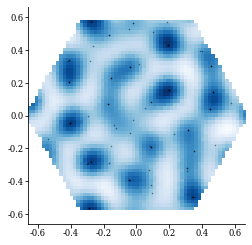

In [6]:
lim = np.amax(np.abs(samples))
bins = np.linspace(-lim, lim, 64)
hist, _, _, _ = scipy.stats.binned_statistic_2d(samples[:,0], samples[:,1], kde, bins = bins)
plt.imshow(hist.T, origin = "lower", extent = [-lim, lim, -lim, lim])
plt.plot(*wrapped_phases.T, "ko", alpha = 0.5, markersize = 0.5)

In [7]:
act_kde = activity_kde(model, power = 10)(samples)

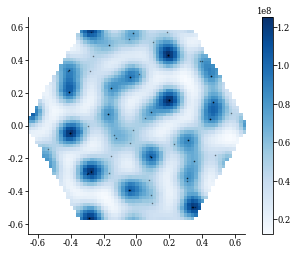

In [8]:
bins = np.linspace(-lim, lim, 64)
hist, _, _, _ = scipy.stats.binned_statistic_2d(samples[:,0], samples[:,1], act_kde, bins = bins)
plt.imshow(hist.T, origin = "lower", extent = [-lim, lim, -lim, lim])
plt.plot(*wrapped_phases.T, "ko", alpha = 0.5)
plt.colorbar()